In [1]:
# Name Dipika Sharma
# DSC 540 T302 Data Preparation
# Week 9 and 10

## Activity 9

### 1. Import the necessary libraries, including regex and beautifulsoup.

In [71]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

### 2. Check the SSL certificate.

In [122]:
# Below code will help us in ignoring the SSL certificate errors.

context_ = ssl.create_default_context()
context_.check_hostname = False
context_.verify_mode = ssl.CERT_NONE

### 3. Read the HTML from the URL

In [123]:
# Using BeautifulSoup to read HTML from the url.

url = 'https://www.gutenberg.org/browse/scores/top'

# Make a GET request to fetch the raw HTML content
response = requests.get(url)

### 4. Write a small function to check the status of the web request.

In [124]:
# Lets define a function to check the status of web request.
# The HTTP 200 means success status response code indicates that the request has succeeded.

def status_check(r):
    if r.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed!")
        return -1

In [125]:
# calling the function to check the status of web request.

status_check(response)

Success!


1

### 5. Decode the response and pass this on to BeautifulSoup for HTML parsing.

In [126]:
# Using decode encoding method to convert the bytecode content into the string.

contents = response.content.decode(response.encoding)

In [128]:
soup = BeautifulSoup(contents, 'html.parser')

### 6. Find all the href tags and store them in the list of links. Check what the list looks like – print the first 30 elements.

In [130]:
# lets declare the empty list to store all the http links in HTML page.

http_links=[]

In [132]:
# Lets find out all the http links using the loop and store them in the list declare above.

for link in soup.find_all('a'):   # finding anchor tag that defines the hyperlink in HTML page.
    http_links.append(link.get('href')) # storing the links in declared list

In [133]:
# let Get all the Items Before a 20th Position of list
http_links[:20]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html']

### 7. Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 eBooks.
### Initialize the empty list to hold the file numbers over an appropriate range 

In [134]:
# Lets declare another empty list to store the file numbers.

file_num=[]

### 8. Use regex to find the numeric digits in the link href string. Use the findall method.

In [135]:
# using loop to go through link list which have top 100 books number from 10 to 110.
# find the numeric digits in the links and store all digits in declared empty list.

for i in range(19,119):
    link=lst_links[i]
    link=link.strip()
    # Using findall to find digits 0-9 in the links
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # storing all the numeric digits in list
        file_num.append(int(n[0]))

In [136]:
# Lets print the list to see all the numeric digits we found in links list from 10 to 110.

print ("\nBelow are all the file numbers we found in top 100 ebooks on Gutenberg\n"+"-"*70)
print(file_num)


Below are all the file numbers we found in top 100 ebooks on Gutenberg
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 33044, 7471, 1342, 84, 11, 64317, 20228, 1661, 345, 174, 2701, 98, 68059, 35899, 68060, 844, 2542, 68063, 76, 1952, 68058, 1400, 1080, 43, 1184, 1260, 32449, 74, 68062, 2600, 46, 5740, 4300, 68064, 5200, 1232, 2591, 2554, 219, 6130, 25344, 730, 68056, 55, 45, 35, 2852, 120, 47629, 1250, 1727, 514, 135, 30254, 1399, 2814, 768, 205, 408, 996, 3207, 58585, 158, 1497, 28054, 13701, 4363, 829, 2500, 3825, 160, 68054, 244, 16, 36, 27827, 67098, 161, 1513, 215, 68053, 1998, 7370, 10676, 4980, 105]


### 9. What does the soup object's text look like? Use the .text method and print only the first 2,000 characters (do not print the whole thing, as it is too long).

In [137]:
# Lets print the first 2000 characters from soup object.
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2022-05-20145781
last 7 days1059696
last 30 days4923681



Top 100 EBooks yesterd

### 10. Search in the extracted text (using a regular expression) from the soup object to find the names of the top 100 eBooks (yesterday's ranking).

In [141]:
# lets declare the empty list to store the string .

ebook_string=[]

### 11. Create a starting index. It should point at the text Top 100 Ebooks yesterday. Use the splitlines method of soup.text. It splits the lines of text of the soup object.

In [142]:
index=soup.text.splitlines().index('Top 100 EBooks yesterday')

### 12. Loop 1-100 to add the strings of the next 100 lines to this temporary list. Hint: use the splitlines method.

In [147]:
# Using loop to store the string of next 100 lines.
for i in range(100):
    ebook_string.append(soup.text.splitlines()[index+2+i])

### 13. Use a regular expression to extract only text from the name strings and append it to an empty list. Use match and span to find the indices and use them.

In [150]:
# lets declare the empty list to store the names of top 100 books. 
book_names=[]

# Using loop to go through each string and find book names and store in declared empty list.
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',ebook_string[i]).span()
    book_names.append(lst_titles_temp[i][id1:id2])

In [151]:
# Lets print the books name of 100 top books
for l in book_names:
    print(l)

Top 
Top 
Top 
Top 


Top 

Birds from North Borneo by Max C. T
The Man with
Pride
Frankenstein; Or, The Modern Prometheus by Mary Wollston
Alice's Adventures in 
The Great Gatsby by F. Scott  Fitzgerald
Noli Me Tangere by Jo
The Adventures of Sherl
Dracula by Bram Stoker
The Picture of Dorian Gray by Oscar Wilde 
Moby Dick
A Tale of Two Cities by Charles Dickens (638)
The man among the monkeys: or, Ninety 
The Philippines a Century Hence by José Rizal
The political novel by
The Importance of Being Earnest: A T
A Doll's House : a play by H
The Red Vineyard by B
Adventures of Huckleberry Finn b
The Yellow Wallpaper by Charlot
Dixie: A monthly magazine,
Great 
A Modest Proposal by Jonathan
The Str
The Count
Jane Eyre: An Autobiography by Char
Japanese Girls and Women by Alice 
The Adventures of Tom S
The play that won by Ralph Henry Barbour (373)
War and Peace by graf Leo Tolstoy (367)
A Christmas Carol in
Tractatus Logico-Philosophicus by Ludwig W
Ulysses by James
Roman politics by Fra


## Activity 10

### 1. Import urllib.request, urllib.parse, urllib.error, and json.

In [176]:
import urllib.request, urllib.parse, urllib.error
import json

### 2. Load the secret API key (you have to get one from the OMDb website and use that; it has a daily limit of 1,000) from a JSON file stored in the same folder in a variable, by using json.loads.

Obtain a key and store it in JSON as APIkeys.json.
Open the APIkeys.json file.

In [177]:
# Stored the key in APIkeys.json file.

with open('APIkeys.json') as f:
    key = json.load(f)
    secretapikey = key['key']

### 3. Assign the OMDb portal (http://www.omdbapi.com/?) as a string to a variable. Create a variable called apikey with the last portion of the URL (&apikey=secretapikey), where secretapikey is your own API key.

In [178]:
url_ = 'http://www.omdbapi.com/?'
apikey = '&apikey='+secretapikey

### 4. Write a utility function called print_json to print the movie data from a JSON file (which we will get from the portal).

In [179]:
# defining function to display data related to movie.
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

### 5. Write a utility function to download a poster of the movie based on the information from the JSON dataset and save it in your local folder. Use the os module. The poster data is stored in the JSON key Poster. Use the Python command to open a file and write the poster data. Close the file after you're done. This function will save the poster data as an image file.

In [190]:
# defining the function to store the movie poster as an image file using os module.

def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    
    # Split function will give us the poster url last string as file extension.
    poster_file_extension=poster_url.split('.')[-1]
    
    # Using urlopen and read to open and read the image file from web.
    poster_data = urllib.request.urlopen(poster_url).read()
       
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    
    # Below code will check if directory path exist or not.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data) # write the poster data
    f.close() # close the file

### 6. Write a utility function called search_movie to search for a movie by its name, print the downloaded JSON data, and save the movie poster in the local folder. Use a try-except loop for this. Use the previously created serviceurl and apikey variables. You have to pass on a dictionary with a key, t, and the movie name as the corresponding value to the urllib.parse.urlencode() function and then add the serviceurl and apikey to the output of the function to construct the full URL. This URL will be used to access the data. The JSON data has a key called Response. If it is True, that means the read was successful. Check this before processing the data. If it's not successful, then print the JSON key Error, which will contain the appropriate error message returned by the movie database.

In [191]:
# Defining function to see if we can make succesful connection to the web portal, If connection is not successful then print the error message.

def search_movie(title):
    try:
        url = url_ + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Check if user want to download the movie poster.
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

### 7. Test the search_movie function by entering Titanic.

In [194]:
# calling movie search function to look Titanic. The poster folder will be created in same drive with poster.jpg file.

search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=f85a48b6
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 125 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '87%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,131,404
imdbID: tt0120338
--------------------------------------------------


### 8. Test the search_movie function by entering "Random_error" (obviously, this will not be found, and you should be able to check whether your error catching code is working properly).

In [193]:
# calling movie search function for "Random_error"

search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=f85a48b6
Error encountered:  Movie not found!


As we can see since the movie name is not valid it is showing "Movie not found"

## Exercise 3 - Connect to the Twitter API 

In [75]:
pip install tweepy

     |████████████████████████████████| 77 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 151 kB 23.4 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 5.6 MB/s  eta 0:00:01
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [119]:
# making connection to twitter using all keys and token
import twitter
api = twitter.Api(consumer_key='5w9ONEL6lpAUC9iR9WzUI9mzL',
  consumer_secret='Fxqm5a6Ovc3Be7U0Y0kLAGW5HlGLbTcf09pjiAhQ3utUWHjQz3',
    access_token_key='1527055997121986562-HiLxe2Hy56SgByU9fFuFduXe0snPjZ',
    access_token_secret='ROexyJ7uq9xYGGm2Q7uu3WjJE4siQu38bZ005lym4lrqU')

In [120]:
# Lets verify credential.

print(api.VerifyCredentials())

{"created_at": "Wed May 18 22:38:27 +0000 2022", "default_profile": true, "default_profile_image": true, "id": 1527055997121986562, "id_str": "1527055997121986562", "name": "Dipika", "profile_background_color": "F5F8FA", "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "Dipika16413016", "withheld_in_countries": []}


In [121]:
# using GetSearch function to look for tweets or post related to Bellevue University, To limit my search I am using since and count.

api.GetSearch(term='Bellevue University', since=2021-11-11, count=10)

[Status(ID=1527678181343260672, ScreenName=HTaubert19, Created=Fri May 20 15:50:35 +0000 2022, Text='RT @MarcusClapp: 🚨Commitment Alert 🚨    \n\nCongrats to Hawks OF @FogelstromH on his commitment to Bellevue University. The Bruins are gettin…'),
 Status(ID=1527655515882287104, ScreenName=kcmetrocanceled, Created=Fri May 20 14:20:32 +0000 2022, Text='Route 271 to University District Bellevue\nDeparting Issaquah Transit Center - Bay 3 at:\n6:59\n\n05/20/2022\n#KCM_271'),
 Status(ID=1527630886077800449, ScreenName=rileymarie07, Created=Fri May 20 12:42:39 +0000 2022, Text='RT @MarcusClapp: 🚨Commitment Alert 🚨    \n\nCongrats to Hawks OF @FogelstromH on his commitment to Bellevue University. The Bruins are gettin…'),
 Status(ID=1527482013778845701, ScreenName=MODLO_, Created=Fri May 20 02:51:05 +0000 2022, Text='RT @MarcusClapp: 🚨Commitment Alert 🚨    \n\nCongrats to Hawks OF @FogelstromH on his commitment to Bellevue University. The Bruins are gettin…'),
 Status(ID=1527477047181836296, S

## Exercise 4 - Visualizations

4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.
a. Line
b. Scatter
c. Bar
d. Histogram
e. Density Plot
f. Pie Chart

In [89]:
# Declaring all the libraries I want to use now.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
# For visualization exercise I am using the college data.
df = pd.read_csv("recent-grads.csv")

In [104]:
# Lets check the top 5 rows of the dataset to learn about the data.
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [165]:
df.shape

(173, 21)

As we can see the college data we using to complete our analyzation has 173 rows and 21 columns.
Also This dataset has different columns like major, men, women, category to define college course, employed to see if student is working or not. 
Along with college information, this dataset also include information about the employment.

### 1. Line Graph

For line graph we can simply use plot function.
This function will show the line graph for every row in dataset.

The x-axis values represent the rank of each institution, and the "P25th", "Median", and "P75th" values are plotted on the y-axis.

<AxesSubplot:xlabel='Rank'>

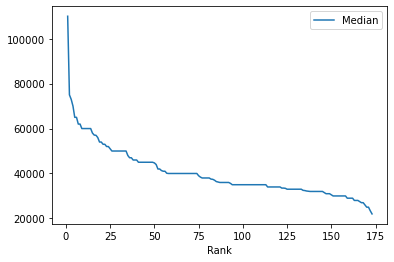

In [167]:
# Lets plot the rank column as x-axis and Median as an y-axis.
#df.plot(x="Rank", y=["P25th", "Median", "P75th"])

df.plot(x="Rank", y=["Median"])

As we can see from the above plot, that the median income decrease with decrease in rank. This also suggest that we can determine rank by using median income. Hence Rank and median columns are interrelated to each other.

### 2. Histogram Graph

In order to see the distribution of values in a dataset we use histogram. Histogram is good to quickly identify if outliers are present in data or not.

In [171]:
# Lets check the type of median column

type(df["Median"])

pandas.core.series.Series

<AxesSubplot:ylabel='Frequency'>

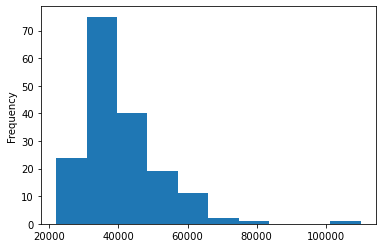

In [173]:
# Using plot function, this time defining the kind to get histogram.

df["Median"].plot(kind="hist")

The above histogram plot suggest that there is a peak in the middle of the graph. We can see outliers in data range above $110,000.
Also the graph looks like symmetric bell shape.

### 3. Scatter plot

Scatter plot is good choice to understand the relationship between different variables in a dataset.

<AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>

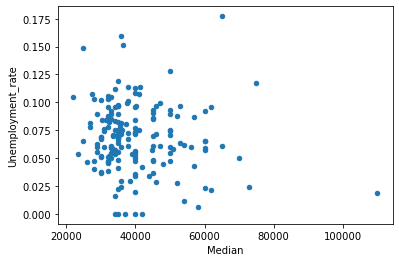

In [174]:
# Lets learn about the correlation between Median income and Unemployment_rate.
# We can use plot function, this time we use kind as scatter.

df.plot(x="Median", y="Unemployment_rate", kind="scatter")

Scatter graph is more visual, from above graph we can understand that there is not significant relationship between both Median income and Unemployment rate variables.